In [1]:
! pip install stochpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.0/279.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/4c/26/e9c0f6ded80916e6d1c91eb4a515ad0b3a1881391b2e76d1c30ca5ec6166/StochPy-23.tar.gz (from https://pypi.org/simple/stochpy/): Requested stochpy from https://files.pythonhosted.org/packages/4c/26/e9c0f6ded80916e6d1c91eb4a515ad0b3a1881391b2e76d1c30ca5ec6166/StochPy-23.tar.gz has inconsistent version: expected '23', but metadata has '2.3'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.3/305.3 kB 3.5 MB/s eta 0:00:00


In [2]:
! pip install Numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: Numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


In [1]:
import stochpy

Info: Model Signaling3cCD.psc copied to /root/Stochpy/pscmodels
Info: Model SignalingTimeVaryingL.psc copied to /root/Stochpy/pscmodels
Info: Model Schlogl.psc copied to /root/Stochpy/pscmodels
Info: Model Burstmodel.psc copied to /root/Stochpy/pscmodels
Info: Model ImmigrationDeath.psc copied to /root/Stochpy/pscmodels
Info: Model BirthDeath.psc copied to /root/Stochpy/pscmodels
Info: Model DecayingDimerizing.psc copied to /root/Stochpy/pscmodels
Info: Model Autoreg.psc copied to /root/Stochpy/pscmodels
Info: Model Autoreg.xml copied to /root/Stochpy/pscmodels
Info: Model CellDivision.psc copied to /root/Stochpy/pscmodels
Info: Model GeneDuplication.psc copied to /root/Stochpy/pscmodels
Info: Model Isomerization.psc copied to /root/Stochpy/pscmodels
Info: Model Polymerase.psc copied to /root/Stochpy/pscmodels
Info: Model TranscriptionIntermediate.psc copied to /root/Stochpy/pscmodels
Info: Model dsmts-001-01.xml.psc copied to /root/Stochpy/pscmodels
Info: Model dsmts-001-01.xml copied

In [3]:
from google.colab import drive
import requests
drive.mount('/content/drive')
file_url = "https://raw.githubusercontent.com/iretes/rock-scissors-paper/main/RSP_model.psc"
response = requests.get(file_url)
with open("/content/drive/My Drive/RSP_model.psc", "wb") as file:
    file.write(response.content)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
smod = stochpy.SSA()
smod.Model(model_file="RSP_model.psc",dir="/content/drive/My Drive")

Adding \n to input file


/usr/local/lib/python3.10/dist-packages/stochpy/implementations/TauLeaping.py:217: RuntimeWarning: All-NaN slice encountered
  minima = np.nanmin(output,axis=1)
/usr/local/lib/python3.10/dist-packages/stochpy/modules/Analysis.py:479: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(Arr_time,y,marker,ls = linestyle,lw = linewidth,color = colors[j])


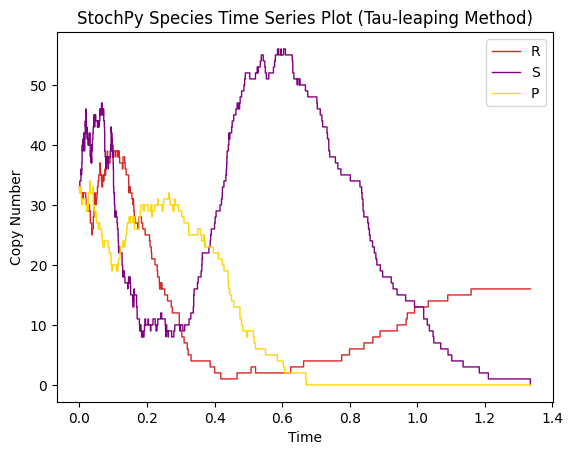

In [5]:
smod.DoStochSim(method='TauLeaping', end=50, mode='time')
smod.PlotSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])
stochpy.plt.title('StochPy Species Time Series Plot (Tau-leaping Method)');

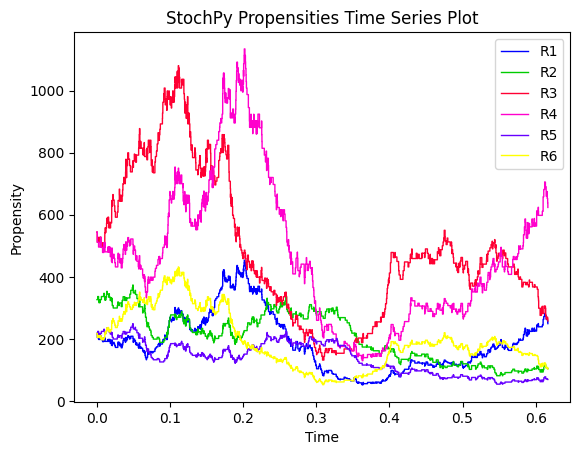

In [6]:
smod.DoStochSim(IsTrackPropensities=True)
smod.PlotPropensitiesTimeSeries(title = 'StochPy Propensities Time Series Plot')

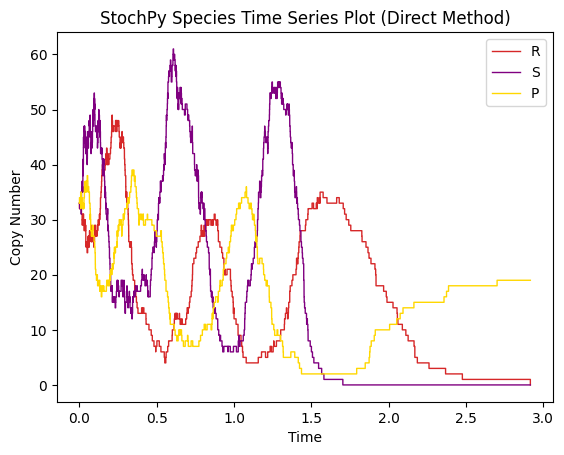

In [7]:
smod.DoStochSim(method='Direct', end=50, mode='time')
smod.PlotSpeciesTimeSeries(title='StochPy Species Time Series Plot (Direct Method)', colors=["tab:red", "purple", "gold"])

*** WARNING ***: No regular grid is created yet. Use GetRegularGrid(n_samples) if averaged results are unsatisfactory (e.g. more or less 'samples')


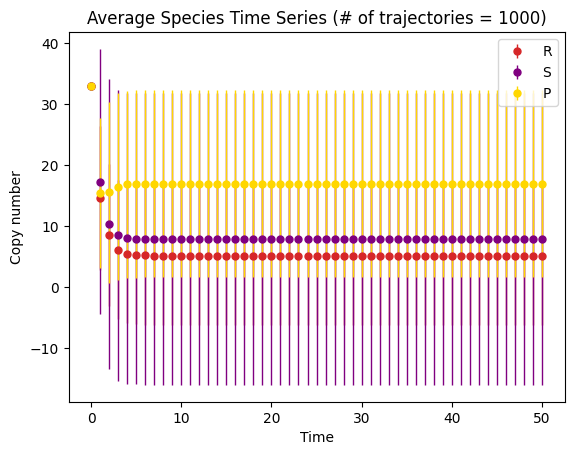

In [8]:
smod.DoStochSim(end = 50, mode = 'time', trajectories = 1000)
smod.PlotAverageSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])

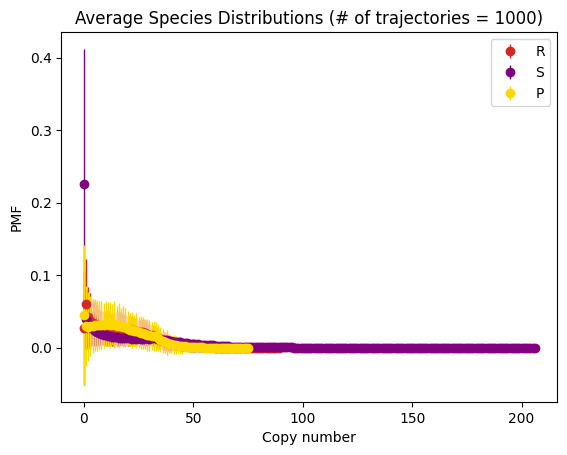

In [9]:
smod.PlotAverageSpeciesDistributions(colors=["tab:red", "purple", "gold"])

Species	Mean
R	15.354
S	11.859
P	11.938
Species	Standard Deviation
R	9.676
S	14.467
P	7.998


Text(0.5, 1.0, 'Species Probability Mass Function')

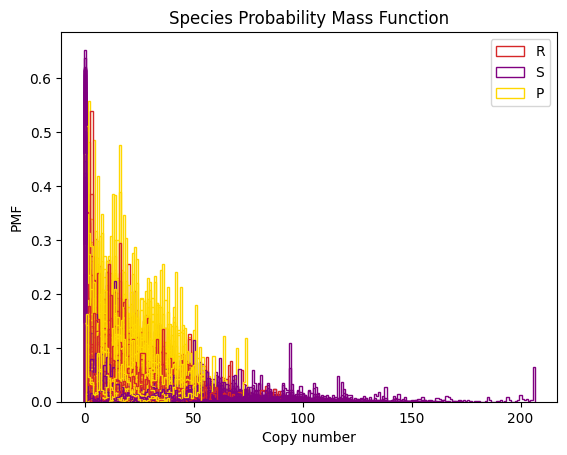

In [10]:
smod.PlotSpeciesDistributions(linestyle= 'solid', colors=["tab:red", "purple", "gold"])
smod.PrintSpeciesMeans()
smod.PrintSpeciesStandardDeviations()
stochpy.plt.title('Species Probability Mass Function')

*** WARNING ***: No regular grid is created yet. Use GetRegularGrid(n_samples) if averaged results are unsatisfactory (e.g. more or less 'samples')


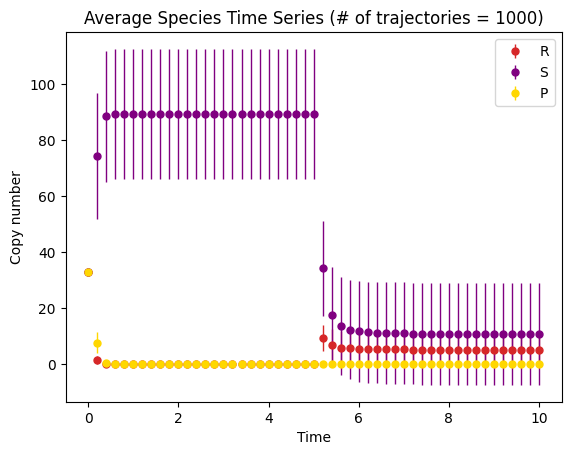

In [11]:
smod.SetDelayParameters({'R1':('fixed', 5)})
smod.DoDelayedStochSim(mode='time', end=10, trajectories=1000)
smod.PlotAverageSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])

Set a delay of 5 time units (5 seconds in this case) to see how the resulting visualization change using a consuming time delay:

*** WARNING ***: No regular grid is created yet. Use GetRegularGrid(n_samples) if averaged results are unsatisfactory (e.g. more or less 'samples')


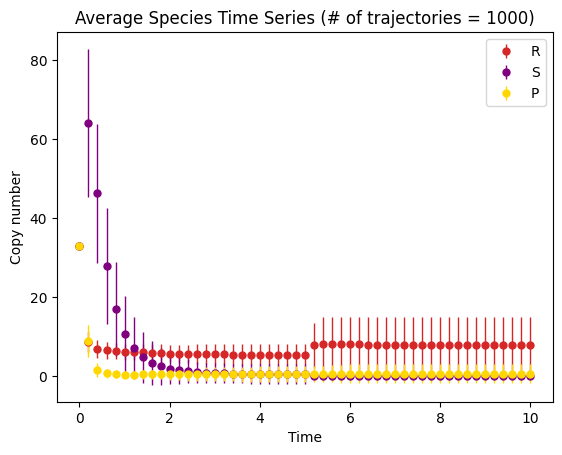

In [12]:
smod.SetDelayParameters({'R1':('fixed', 5)}, nonconsuming_reactions=['R1'])
smod.DoDelayedStochSim(mode='time', end=10, trajectories=1000)
smod.PlotAverageSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])

Do the same with a non-consuming time delay, which means that both the degradation of reaction substrates and the production of reaction products is delayed:

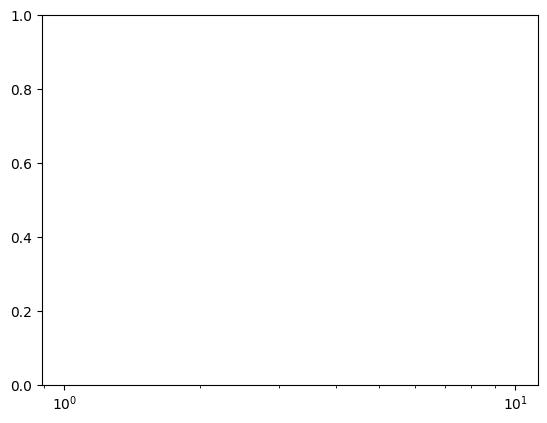

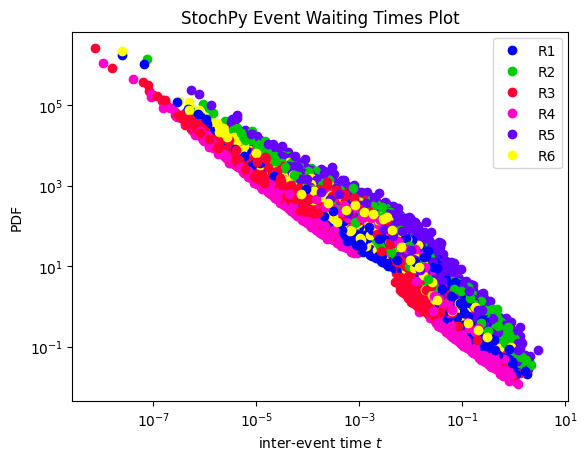

In [13]:
stochpy.plt.xscale('log')
smod.PlotWaitingtimesDistributions(title='StochPy Event Waiting Times Plot')

In [ ]:
# USEFUL COMMANDS:
# stochpy.plt.savefig('file_name.png')
# marker="o"